In [298]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
from scipy.signal import savgol_filter
from os import getcwd, mkdir
from os.path import abspath
from time import time
print(abspath(""))
IMG_DIRPATH = "../../img/"

D:\Kerjaan\Pemlan\Handwriting-Digit-Detection\src\JupyterNotebook


# Picture Plotting Utility Function

In [299]:
def showPicture(pixels, isRGB, caption=""):
    if isRGB:
        fig = plt.figure()
        plt.axis("off")
        img_RGB = cv2.cvtColor(pixels, cv2.COLOR_BGR2RGB)
        fig.text(.5, 0.12, caption, ha = 'center',)
        plt.imshow(img_RGB)
        plt.show()
    else:
        fig = plt.figure()
        plt.axis("off")
        fig.text(.5, 0.12, caption, ha = 'center',)
        plt.imshow(pixels, cmap='gray', vmin=0, vmax=255)
        plt.show()
        
    

# Shadow Removal Class

In [300]:
class ShadowRemoval():
  def __init__(self, img):
    self.img = img
    self.kernel = np.ones((7, 7), np.uint8)
    self.output = None

  def backgroudRemoval(self):
    fgbg = cv2.bgsegm.createBackgroundSubtractorMOG() 
    self.output = fgbg.apply(self.img.pixels)

  def remove(self, iterations=1):
    rgb_planes = cv2.split(self.img.pixels)
    result_norm_planes = []
    for plane in rgb_planes:
        dilated_img = cv2.dilate(plane, np.ones((11,11), np.uint8))
        bg_img = cv2.medianBlur(dilated_img, 21)
        diff_img = 255 - cv2.absdiff(plane, bg_img)
        norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
        result_norm_planes.append(norm_img)
    shadowremov = cv2.merge(result_norm_planes)
    self.output = shadowremov
    
    

  def update(self):
    self.img.pixels = self.output

# Image Class

In [301]:
class Image():
    def __init__(self, filename) -> None:
        self.pixels = cv2.imread(filename)
        self.backup = None

    def toGrayscale(self):
      self.pixels = cv2.cvtColor(self.pixels, cv2.COLOR_BGR2GRAY)
      
    def invertColor(self, thresh):
      min = 0
      max = thresh
      ny, nx = np.shape(self.pixels)
      for i in range(ny):
        for j in range(nx):
          if min <= self.pixels[i][j] <= max:
            self.pixels[i][j] = 255
          else:
            self.pixels[i][j] = 0

    def accentPicture(self, iterations=1):
      self.pixels = cv2.erode(self.pixels, np.ones((7,7), np.uint8), iterations=iterations)

    def doBackup(self):
      self.backup = np.copy(self.pixels)

    def restart(self):
      self.pixels = np.copy(self.backup)

    def show(self, txt):
        fig = plt.figure()
        plt.axis("off")
        fig.text(.5, 0.12, txt, ha = 'center')
        plt.imshow(self.pixels, cmap = 'gray')
        plt.show()


# Image preprocess
1. Remove Shadow

---


2. Convert to grayscale

---


3. Invert color (background will be black __(0)__ text will be white __(255)__)

In [302]:
FILENAME = "296566.jpg"
try:
    mkdir(abspath("../../out/{}".format(FILENAME)))
except Exception as e:
    print(e)

[WinError 183] Cannot create a file when that file already exists: 'D:\\Kerjaan\\Pemlan\\Handwriting-Digit-Detection\\out\\296566.jpg'


In [303]:
IMG_FILEPATH = IMG_DIRPATH + FILENAME

In [304]:
# load image
img2 = Image(IMG_FILEPATH)
img2.toGrayscale()

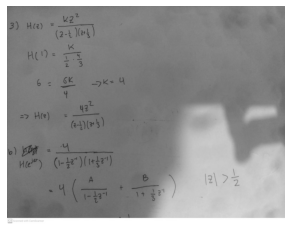

In [305]:
showPicture(img2.pixels, True)

In [306]:
shr2 = ShadowRemoval(img2)
shr2.remove()

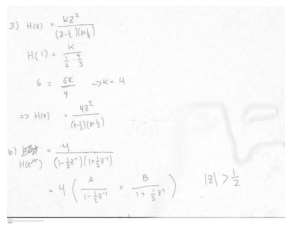

In [307]:
showPicture(shr2.output, True)

Hasil shadow removal

In [308]:
shr2.update()
#img2.accentPicture()

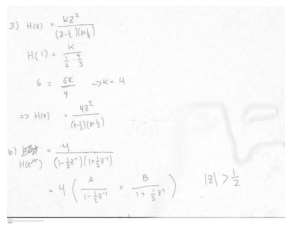

In [309]:
showPicture(img2.pixels, True)

In [310]:
p = cv2.dilate(img2.pixels, np.ones((3,3), np.uint8), iterations=5)
# p = cv2.erode(p, np.ones((7,7), np.uint8), iterations=5)

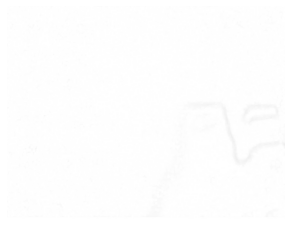

In [311]:
showPicture(p, True)

In [312]:
diff_img = 255 - cv2.absdiff(img2.pixels, p)
norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)

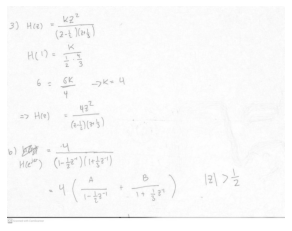

In [313]:
showPicture(norm_img, True)

In [314]:
q = np.copy(img2.pixels)

In [315]:
#for i in range(3):
#  p = cv2.dilate(q, np.ones((7,7), np.uint8), iterations=5)
#  p = cv2.medianBlur(p, 21)
#  diff_img = 255 - cv2.absdiff(q, p)
#  norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
#  q = norm_img
  


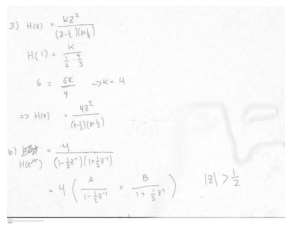

In [316]:
showPicture(q, True)

In [317]:
img2.pixels = q[:]

# Image pixels density graph

In [318]:
import seaborn as sns
def plotDensity(img):
  x = img2.pixels.reshape(1, -1)[0]
  sns.set_style('whitegrid')
  plt.xlim(0, 255)
  X, Y = sns.kdeplot(x, bw=0.5, gridsize=500).get_lines()[0].get_data()
  return X, Y

C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


(array([-1.85469240e+01, -1.79615656e+01, -1.73762072e+01, -1.67908488e+01,
        -1.62054903e+01, -1.56201319e+01, -1.50347735e+01, -1.44494151e+01,
        -1.38640567e+01, -1.32786983e+01, -1.26933399e+01, -1.21079815e+01,
        -1.15226230e+01, -1.09372646e+01, -1.03519062e+01, -9.76654780e+00,
        -9.18118939e+00, -8.59583098e+00, -8.01047257e+00, -7.42511415e+00,
        -6.83975574e+00, -6.25439733e+00, -5.66903891e+00, -5.08368050e+00,
        -4.49832209e+00, -3.91296368e+00, -3.32760526e+00, -2.74224685e+00,
        -2.15688844e+00, -1.57153002e+00, -9.86171612e-01, -4.00813199e-01,
         1.84545214e-01,  7.69903627e-01,  1.35526204e+00,  1.94062045e+00,
         2.52597887e+00,  3.11133728e+00,  3.69669569e+00,  4.28205410e+00,
         4.86741252e+00,  5.45277093e+00,  6.03812934e+00,  6.62348775e+00,
         7.20884617e+00,  7.79420458e+00,  8.37956299e+00,  8.96492141e+00,
         9.55027982e+00,  1.01356382e+01,  1.07209966e+01,  1.13063551e+01,
         1.1

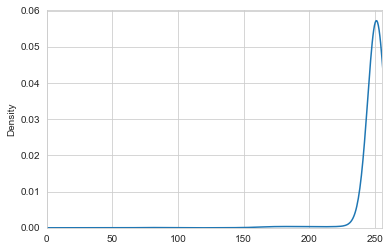

In [319]:
plotDensity(img2.pixels)

# Image Thresholding

In [320]:
def fromPixelsToHistogram(img):
    id = np.array([i for i in range(0, 256)])
    x = np.array([0 for i in range(0, 256)])
    Y = img.pixels.reshape(1, -1)[0] # change matrix into an array

    for pix_val in Y:
      x[pix_val] += 1     
    window = 21
    order = 2

    x_smoothen = savgol_filter(x, window, order)
    x_smoothen[x_smoothen<0] = 0
    x_smoothen /= len(Y)
    return np.round(x_smoothen, 5)

def findPeak(x):
  # just find the maximum value between 0 - 200
  peak = [0, 0]
  for i in range(200):
    if peak[1] < x[i]:
      peak = [i, x[i]]

  return peak

def fromPeakToThreshold(X, realPeak, max_dist_percentage=0.1):
    def findValley():
      valley = 1
      for i in range(realPeak[0], 201):
        valley = min(valley, X[i])
      
      digit = 0
      mult = 1
      temp = valley * 1
      while temp < 1:
        temp *= 10
        mult *= 10
        digit += 1

      return valley, mult, digit
    
    i = realPeak[0]
    valley, mult, digit = findValley()

    thresh = 200 # if not found any valley, therefore always monotonic decrease, then the thresh value would be the biggest possible pixel value
    thresh_val = round(valley + (1 / mult), digit)
    for i in range(i + 1, 201):
      print(i, X[i])
      if X[i - 1] > X[i] and X[i + 1] > X[i]:

        if X[i] <= thresh_val:
          thresh = i

      last_value = X[i]
      i += 1
      

    return thresh

In [321]:
X = fromPixelsToHistogram(img2)

In [322]:
peak = findPeak(X)

In [323]:
peak

[178, 0.00039]

In [324]:
thresh = fromPeakToThreshold(X, peak)

179 0.00039
180 0.00036
181 0.00035
182 0.00034
183 0.00034
184 0.00037
185 0.00037
186 0.00034
187 0.00034
188 0.00034
189 0.00034
190 0.00035
191 0.00038
192 0.00038
193 0.00035
194 0.00035
195 0.00035
196 0.00035
197 0.00038
198 0.00037
199 0.00034
200 0.00033


In [325]:
thresh

200

In [326]:
thresh

200

In [327]:
# run this to backup image
img2.doBackup()

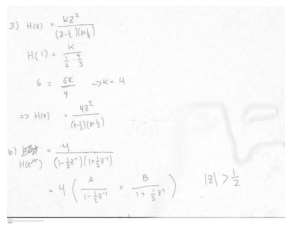

In [328]:
showPicture(img2.backup, True)

# Invert Image and Save Result

In [329]:
start_time = time()
img2.invertColor(thresh)
end_time = time()
print((end_time - start_time) * 1000, "ms")

6208.165884017944 ms


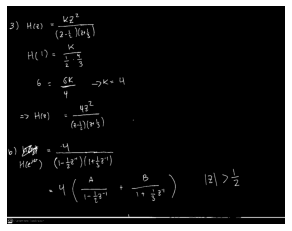

In [330]:
showPicture(img2.pixels, True)

In [331]:
# save result in root/out
path = abspath("..\..\out\{}\/frame_out.png").format(FILENAME)
img_new = PIL.Image.fromarray(img2.pixels, mode="L")
img_new.save(path, mode="L")

In [332]:
#img2.accentPicture()

In [333]:
# save result in root/out
path = abspath("..\..\out\{}\/frame_out_accent.png").format(FILENAME)

img_new = PIL.Image.fromarray(img2.pixels, mode="L")
img_new.save(path, mode="L")

In [334]:
# run this to restart images to last state
# img2.restart()

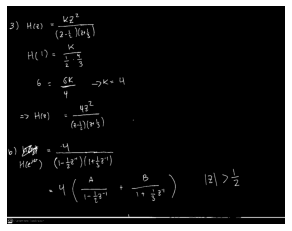

In [335]:
showPicture(img2.pixels, True)

# Bounding Box
Bounding box is the the smallest rectangles that encapsulate an object (for our case is a number)
To find bounding box, first find all connected pixels, then from connected pixels store the minP and maxP. Then from there, we can construct the bounding box

Algorithm Complexity is:
Time : $O(NM * log(N_{object}))$
Space : $O(min(N, M) + N_{object})$

In [336]:
class Node():
  def __init__(self, id : int, pos : list[list[int]]):
    self.root = None
    self.id   = id
    self.pos  = pos
  
  def getRoot(self) -> "Node":
    node = self
    while (node.root != None):
      node = node.root
      
    return node
  
  def getID(self) -> int:
    return self.getRoot().id
      
  def __eq__(self, __o: object) -> bool:
    # would run in O(N_OBJ) time
    if type(self) == type(__o):
      return self.getID() == __o.getID()
    
    else:
      return False
  
  def updateValue(self, new_value : list[int], fnc) -> None:
    root = self.getRoot()
    fnc(root.pos, new_value)
    
  @classmethod
  def resolvedNodeConflict(cls, roots: list["Node"], resolve_fnc) -> None:
    # nodes will have max length of 4, and getRoot would need log(N_OBJ)
    # therefore will run in log(N_OBJ) time
    newRootVal = resolve_fnc(roots)
    newID = roots[-1].id # random new ID
    
    newRoot = cls(newID, newRootVal)
    
    for root in roots:
      root.root = newRoot
      root.pos = None
    
    return newID

In [337]:
class BoundingBox():
    def __init__(self, pixels):
        self.img = pixels
        self.objects = [] # list of shape
        self.result = np.copy(pixels)
        
    def find(self):
        # search object
        self.__searchObjects()
        # then create bounding box using data from self.objects
        self.__createBoudingBox()
    
    def resolveFunc(self, roots):
      ref = roots[0].pos
      for i in range(1, len(roots)):
        self.updateFunc(ref, roots[i].pos)
      
      return ref
  
    def updateFunc(self, obj, new_loc : list[list[object]]):
      # In place change the object data
      if len(new_loc) == 1:
          new_loc_i1, new_loc_j1 = new_loc[0]
          new_loc_i2 = new_loc_i1
          new_loc_j2 = new_loc_j1
      else:
          [new_loc_i1, new_loc_j1], [new_loc_i2, new_loc_j2] = new_loc
          
      [min_i, min_j], [max_i, max_j] = obj
      
      obj[0][0] = min(new_loc_i1, min_i)
      obj[0][1] = min(new_loc_j1, min_j)
      obj[1][0] = max(new_loc_i2, max_i)
      obj[1][1] = max(new_loc_j2, max_j)
                
    def __updateObject(self, member_id : int, *new_loc : tuple[int]):
        obj_node : Node = self.objects[member_id - 1]
        obj_node.updateValue([new_loc], self.updateFunc)
                   
    def __resolvedConflict(self, roots : list[Node]):
      return Node.resolvedNodeConflict(roots, self.resolveFunc)
        
    def __createObject(self, *location):
        location = list(location)
        new_node = Node(len(self.objects) + 1, [location, location[:]])
        self.objects.append(new_node)
        return new_node.id
    
    def __searchObjects(self):
        n_i, n_j = np.shape(self.img)
        # upper stram and box consist of member_id of each pixels. Member_id indicate which object this pixels belong to
        # upper_stream holds data for all pixels on the upper side of current pixel
        # box holds data for pixel on the left of current pixel
        # the smallest id is 1, 0 -> no member
        upper_stream = [0 for i in range(n_j)]
        box = 0
        # scan each pixels, going from upper left to lower right
        for i in range(n_i):
          for j in range(n_j):  
            if self.img[i][j] == 0: 
              if box != 0:
                upper_stream[j - 1] = box
                box = 0
              continue
            # because going from upper left to lower right, only need to check pixel from upper and left
            conflict = False
            dict = {box : True} if box != 0 else {}
 
            # check upper if exist
            if i - 1 >= 0:
              for k in range(j - 1, j + 2):
                if k < n_j and self.img[i - 1][k] != 0:
                    if dict.get(upper_stream[k], False) == True:
                      continue
                    if len(dict) == 0:
                      dict[upper_stream[k]] = True
                    
                    # Check for conflict
                    elif len(dict) == 1:
                      roots = []
                      id1 = list(dict.keys())[0]
                      id2 = upper_stream[k]
                      
                      root1 = self.objects[id1 - 1].getRoot()
                      root2 = self.objects[id2 - 1].getRoot()
                      if (root1 != root2):
                        conflict = True
                        roots.append(root1)
                        roots.append(root2)
                        dict[upper_stream[k]] = True
                    
                    elif len(dict) > 1:
                      id3 = upper_stream[k]
                      root3 = self.objects[id3 - 1].getRoot()
                      for root in roots:
                        if (root != root3):
                          roots.append(root3)
                          dict[upper_stream[k]] = True

            if len(dict) == 0:
                # create new object
                member_id = self.__createObject(i, j)
            else:  
              if not conflict:
                  # determine member id
                  member_id = list(dict.keys())[0]
                  # update object
                  self.__updateObject(member_id, i, j)
              else:
                  # resolved conflict, connected object can't have more than one member_id
                  member_id = self.__resolvedConflict(roots)

            # update upper stream value and box
            if box == 0:
                box = member_id

            elif box != 0:
                upper_stream[j - 1] = box
                box = member_id
                    
    def getObject(self):
      dict = {}
      for i in range(len(self.objects)):
        root = self.objects[i].getRoot()
        if dict.get(root.id, None) != None:
          continue
        dict[root.id] = root.pos
      return list(dict.values())
        
        
    def __createBoudingBox(self):
        shapes = self.getObject()
        for shape in shapes:
            [min_i, min_j], [max_i, max_j] = shape
          
            for i in range(min_i, max_i + 1):
              self.result[i][min_j] = 255
              self.result[i][max_j] = 255
          
            for j in range(min_j, max_j + 1):
              self.result[min_i][j] = 255
              self.result[max_i][j] = 255
          
    
def createTestImg(number):
  f = open("src/test/{}.txt".format(number))
  lines = map(lambda x: x.replace("\n", ""), f.readlines())
  pixels = []
  for line in lines:
    pixels.append(list(map(lambda x: int(x), line.split(","))))
    
  return pixels
    

In [338]:
bbox = BoundingBox(img2.pixels)

In [339]:
start_time = time()
bbox.find()
end_time = time()
print((end_time - start_time) * 1000, "ms")

4266.754627227783 ms


In [340]:
s = bbox.getObject()

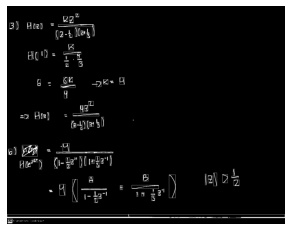

In [341]:
showPicture(bbox.result, False)

In [342]:
# save result in root/out
path = abspath("..\..\out\{}\/frame_out_bbox.png").format(FILENAME)
img_new = PIL.Image.fromarray(bbox.result, mode="L")
img_new.save(path, mode="L")

# References
[1]. https://stackoverflow.com/questions/4150171/how-to-create-a-density-plot-in-matplotlib </br>
[2]. https://www.geeksforgeeks.org/erosion-dilation-images-using-opencv-python/ </br>
[3]. https://medium.com/arnekt-ai/shadow-removal-with-open-cv-71e030eadaf5